In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv("dataset_Caso_1.csv")
data.describe()

,x1,x2,x5,x6,x7,x8,target
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,101.074885,-298.282145,0.01250,0.027000,3.440500,-5.343500,0.011000
std,22.670474,16.596490,0.11113,0.162124,0.972591,1.570108,0.104329
min,50.134100,-326.000000,0.00000,0.000000,3.000000,-7.500000,0.000000
25%,89.501675,-308.930400,0.00000,0.000000,3.000000,-6.500000,0.000000
50%,105.236100,-297.825600,0.00000,0.000000,3.000000,-5.500000,0.000000
75%,116.023175,-288.169025,0.00000,0.000000,3.000000,-4.500000,0.000000
max,150.134100,-226.000000,1.00000,1.000000,8.000000,-1.500000,1.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2000 non-null   float64
 1   x2      2000 non-null   float64
 2   x3      2000 non-null   object 
 3   x4      2000 non-null   object 
 4   x5      2000 non-null   int64  
 5   x6      2000 non-null   int64  
 6   x7      2000 non-null   int64  
 7   x8      2000 non-null   float64
 8   target  2000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 140.8+ KB


In [12]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,target
0,50.1341,-326.0000,SAT,MZBER,0,0,6,-6.5,0
1,50.1341,-326.0000,SAT,MZBER,0,0,6,-4.5,0
2,124.3276,-275.1935,LCV,MZBER,0,0,3,-2.5,0
3,50.1341,-326.0000,SAT,MZBER,0,0,3,-4.5,0
4,85.3905,-298.8632,XJB,MZBER,0,0,5,-4.5,0
...,...,...,...,...,...,...,...,...,...
1995,119.2548,-283.6687,QKP,MZBER,0,0,3,-2.5,0
1996,106.2410,-294.7023,XJB,YEQA,0,0,3,-2.5,0
1997,127.0572,-295.2308,SAT,MZBER,0,0,3,-5.5,0
1998,114.4653,-290.3312,LCV,MZBER,0,0,3,-5.5,0


In [78]:
data["x5"].unique()


array([0, 1])

In [79]:
data["x6"].unique()

array([0, 1])

In [80]:
data["x7"].unique()

array([6, 3, 5, 4, 8])

In [81]:
data["x8"].unique()

array([-6.5, -4.5, -2.5, -3.5, -5.5, -7.5, -1.5])

In [14]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(data["x3"].values.reshape(-1, 1)).toarray()
data_encoded = pd.concat([data.drop('x3', axis=1), pd.DataFrame(onehot_encoded)], axis=1)
data_encoded


,x1,x2,x4,x5,x6,x7,x8,target,0,1,2,3
0,50.1341,-326.0000,MZBER,0,0,6,-6.5,0,0.0,0.0,1.0,0.0
1,50.1341,-326.0000,MZBER,0,0,6,-4.5,0,0.0,0.0,1.0,0.0
2,124.3276,-275.1935,MZBER,0,0,3,-2.5,0,1.0,0.0,0.0,0.0
3,50.1341,-326.0000,MZBER,0,0,3,-4.5,0,0.0,0.0,1.0,0.0
4,85.3905,-298.8632,MZBER,0,0,5,-4.5,0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,119.2548,-283.6687,MZBER,0,0,3,-2.5,0,0.0,1.0,0.0,0.0
1996,106.2410,-294.7023,YEQA,0,0,3,-2.5,0,0.0,0.0,0.0,1.0
1997,127.0572,-295.2308,MZBER,0,0,3,-5.5,0,0.0,0.0,1.0,0.0
1998,114.4653,-290.3312,MZBER,0,0,3,-5.5,0,1.0,0.0,0.0,0.0


In [13]:
onehot_encoder2 = OneHotEncoder()
onehot_encoded2 = onehot_encoder2.fit_transform(data["x4"].values.reshape(-1, 1)).toarray()
data_encoded2 = pd.concat([data_encoded.drop('x4', axis=1), pd.DataFrame(onehot_encoded)], axis=1)
data_encoded2

,x1,x2,x5,x6,x7,x8,target,0,1,2,3,0,1,2,3
0,50.1341,-326.0000,0,0,6,-6.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,50.1341,-326.0000,0,0,6,-4.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,124.3276,-275.1935,0,0,3,-2.5,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,50.1341,-326.0000,0,0,3,-4.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,85.3905,-298.8632,0,0,5,-4.5,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,119.2548,-283.6687,0,0,3,-2.5,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1996,106.2410,-294.7023,0,0,3,-2.5,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1997,127.0572,-295.2308,0,0,3,-5.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1998,114.4653,-290.3312,0,0,3,-5.5,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [23]:
data_encoded2.columns = ["x1","x2","x5","x6","x7","x8","target",
                             "x3_cod0","x3_cod1","x3_cod2","x3_cod3",
                            "x4_cod0","x4_cod1","x4_cod2","x4_cod3"]
data_encoded2

,x1,x2,x5,x6,x7,x8,target,x3_cod0,x3_cod1,x3_cod2,x3_cod3,x4_cod0,x4_cod1,x4_cod2,x4_cod3
0,50.1341,-326.0000,0,0,6,-6.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,50.1341,-326.0000,0,0,6,-4.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,124.3276,-275.1935,0,0,3,-2.5,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,50.1341,-326.0000,0,0,3,-4.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,85.3905,-298.8632,0,0,5,-4.5,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,119.2548,-283.6687,0,0,3,-2.5,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1996,106.2410,-294.7023,0,0,3,-2.5,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1997,127.0572,-295.2308,0,0,3,-5.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1998,114.4653,-290.3312,0,0,3,-5.5,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
data_encoded2.corr()

,x1,x2,x5,x6,x7,x8,target,x3_cod0,x3_cod1,x3_cod2,x3_cod3,x4_cod0,x4_cod1,x4_cod2,x4_cod3
x1,1.000000,0.473990,0.030226,-0.000131,-0.244156,0.111917,0.030486,0.098770,0.037128,-0.144853,0.037297,0.098770,0.037128,-0.144853,0.037297
x2,0.473990,1.000000,0.007558,-0.032315,-0.265814,0.171948,0.019244,0.090837,0.031498,-0.140267,0.045522,0.090837,0.031498,-0.140267,0.045522
x5,0.030226,0.007558,1.000000,0.036790,-0.009315,0.060458,0.333312,-0.005190,0.023393,-0.046364,0.058364,-0.005190,0.023393,-0.046364,0.058364
x6,-0.000131,-0.032315,0.036790,1.000000,0.013366,0.008940,0.189463,-0.055692,0.124593,-0.008400,0.021692,-0.055692,0.124593,-0.008400,0.021692
x7,-0.244156,-0.265814,-0.009315,0.013366,1.000000,-0.131977,0.011384,-0.090651,-0.041710,0.168497,-0.079048,-0.090651,-0.041710,0.168497,-0.079048
x8,0.111917,0.171948,0.060458,0.008940,-0.131977,1.000000,0.023078,0.005162,0.171114,-0.197324,0.169075,0.005162,0.171114,-0.197324,0.169075
target,0.030486,0.019244,0.333312,0.189463,0.011384,0.023078,1.000000,-0.001788,0.077057,-0.038659,0.012710,-0.001788,0.077057,-0.038659,0.012710
x3_cod0,0.098770,0.090837,-0.005190,-0.055692,-0.090651,0.005162,-0.001788,1.000000,-0.188301,-0.692636,-0.374643,1.000000,-0.188301,-0.692636,-0.374643
x3_cod1,0.037128,0.031498,0.023393,0.124593,-0.041710,0.171114,0.077057,-0.188301,1.000000,-0.151269,-0.081821,-0.188301,1.000000,-0.151269,-0.081821
x3_cod2,-0.144853,-0.140267,-0.046364,-0.008400,0.168497,-0.197324,-0.038659,-0.692636,-0.151269,1.000000,-0.300965,-0.692636,-0.151269,1.000000,-0.300965


In [82]:
X_para_pca = data[["x1","x2"]]
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_pca = sc.fit_transform(X_para_pca)
pca = PCA(n_components=1)
X_pca2 = pca.fit_transform(X)
X_df_pca = pd.DataFrame(data=X_pca2, columns=['PC1'])
X_df_pca

,PC1
0,1.085710
1,1.085710
2,-0.910175
3,1.085710
4,0.196582
...,...
1995,0.142639
1996,0.196582
1997,1.085710
1998,-0.910175


In [83]:
data_modelo = pd.concat([X_df_pca, data_encoded2], axis = 1)
data_modelo

,PC1,x1,x2,x5,x6,x7,x8,target,x3_cod0,x3_cod1,x3_cod2,x3_cod3,x4_cod0,x4_cod1,x4_cod2,x4_cod3
0,1.085710,50.1341,-326.0000,0,0,6,-6.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.085710,50.1341,-326.0000,0,0,6,-4.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.910175,124.3276,-275.1935,0,0,3,-2.5,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.085710,50.1341,-326.0000,0,0,3,-4.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.196582,85.3905,-298.8632,0,0,5,-4.5,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.142639,119.2548,-283.6687,0,0,3,-2.5,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1996,0.196582,106.2410,-294.7023,0,0,3,-2.5,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1997,1.085710,127.0572,-295.2308,0,0,3,-5.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1998,-0.910175,114.4653,-290.3312,0,0,3,-5.5,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [84]:
data_modelo2 = data_modelo.drop(["x1","x2"], axis = 1)
data_modelo2

,PC1,x5,x6,x7,x8,target,x3_cod0,x3_cod1,x3_cod2,x3_cod3,x4_cod0,x4_cod1,x4_cod2,x4_cod3
0,1.085710,0,0,6,-6.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.085710,0,0,6,-4.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.910175,0,0,3,-2.5,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.085710,0,0,3,-4.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.196582,0,0,5,-4.5,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.142639,0,0,3,-2.5,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1996,0.196582,0,0,3,-2.5,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1997,1.085710,0,0,3,-5.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1998,-0.910175,0,0,3,-5.5,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [85]:
data_modelo2.corr()

,PC1,x5,x6,x7,x8,target,x3_cod0,x3_cod1,x3_cod2,x3_cod3,x4_cod0,x4_cod1,x4_cod2,x4_cod3
PC1,1.000000,-0.019287,0.029645,0.135763,-0.098525,-0.018009,-0.938263,0.032254,0.899270,0.088116,-0.938263,0.032254,0.899270,0.088116
x5,-0.019287,1.000000,0.036790,-0.009315,0.060458,0.333312,-0.005190,0.023393,-0.046364,0.058364,-0.005190,0.023393,-0.046364,0.058364
x6,0.029645,0.036790,1.000000,0.013366,0.008940,0.189463,-0.055692,0.124593,-0.008400,0.021692,-0.055692,0.124593,-0.008400,0.021692
x7,0.135763,-0.009315,0.013366,1.000000,-0.131977,0.011384,-0.090651,-0.041710,0.168497,-0.079048,-0.090651,-0.041710,0.168497,-0.079048
x8,-0.098525,0.060458,0.008940,-0.131977,1.000000,0.023078,0.005162,0.171114,-0.197324,0.169075,0.005162,0.171114,-0.197324,0.169075
target,-0.018009,0.333312,0.189463,0.011384,0.023078,1.000000,-0.001788,0.077057,-0.038659,0.012710,-0.001788,0.077057,-0.038659,0.012710
x3_cod0,-0.938263,-0.005190,-0.055692,-0.090651,0.005162,-0.001788,1.000000,-0.188301,-0.692636,-0.374643,1.000000,-0.188301,-0.692636,-0.374643
x3_cod1,0.032254,0.023393,0.124593,-0.041710,0.171114,0.077057,-0.188301,1.000000,-0.151269,-0.081821,-0.188301,1.000000,-0.151269,-0.081821
x3_cod2,0.899270,-0.046364,-0.008400,0.168497,-0.197324,-0.038659,-0.692636,-0.151269,1.000000,-0.300965,-0.692636,-0.151269,1.000000,-0.300965
x3_cod3,0.088116,0.058364,0.021692,-0.079048,0.169075,0.012710,-0.374643,-0.081821,-0.300965,1.000000,-0.374643,-0.081821,-0.300965,1.000000


In [159]:
X = data_encoded2[['x5', 'x6',"x3_cod0","x3_cod1","x3_cod2","x3_cod3",
                            "x4_cod0","x4_cod1","x4_cod2","x4_cod3"]]
y = data['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)
from sklearn.metrics import roc_auc_score, f1_score

f1_test = f1_score(y_test, y_test_pred)
auc_train = roc_auc_score(y_train, y_train_pred)
auc_test = roc_auc_score(y_test, y_test_pred, average = "weighted")
print("AUC train: %.4f" % auc_train)
print("AUC test: %.4f" % auc_test)
print("F-1 score (test): %.4f" % f1_test)

AUC train: 0.5556
AUC test: 0.5000
F-1 score (test): 0.0000


In [160]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir las probabilidades de clase con los datos de entrenamiento y prueba
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calcular el AUC y F1-Score para los datos de entrenamiento
auc_train = roc_auc_score(y_train, y_train_proba)
f1_train = f1_score(y_train, model.predict(X_train))

# Calcular el AUC y F1-Score para los datos de prueba
auc_test = roc_auc_score(y_test, y_test_proba)
f1_test = f1_score(y_test, model.predict(X_test), average = "weighted")

# Imprimir los resultados
print("AUC (train): {:.3f}".format(auc_train))
print("AUC (test): {:.3f}".format(auc_test))
print("F1-Score (train): {:.3f}".format(f1_train))
print("F1-Score (test): {:.3f}".format(f1_test))


AUC (train): 0.834
AUC (test): 0.855
F1-Score (train): 0.105
F1-Score (test): 0.985


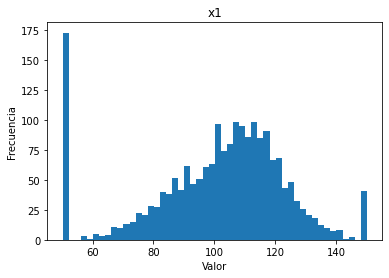

In [117]:
import matplotlib.pyplot as plt
plt.hist(data["x1"], bins=50)
plt.title('x1')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()



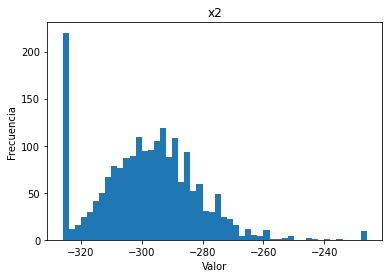

In [118]:
plt.hist(data["x2"], bins=50)
plt.title('x2')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

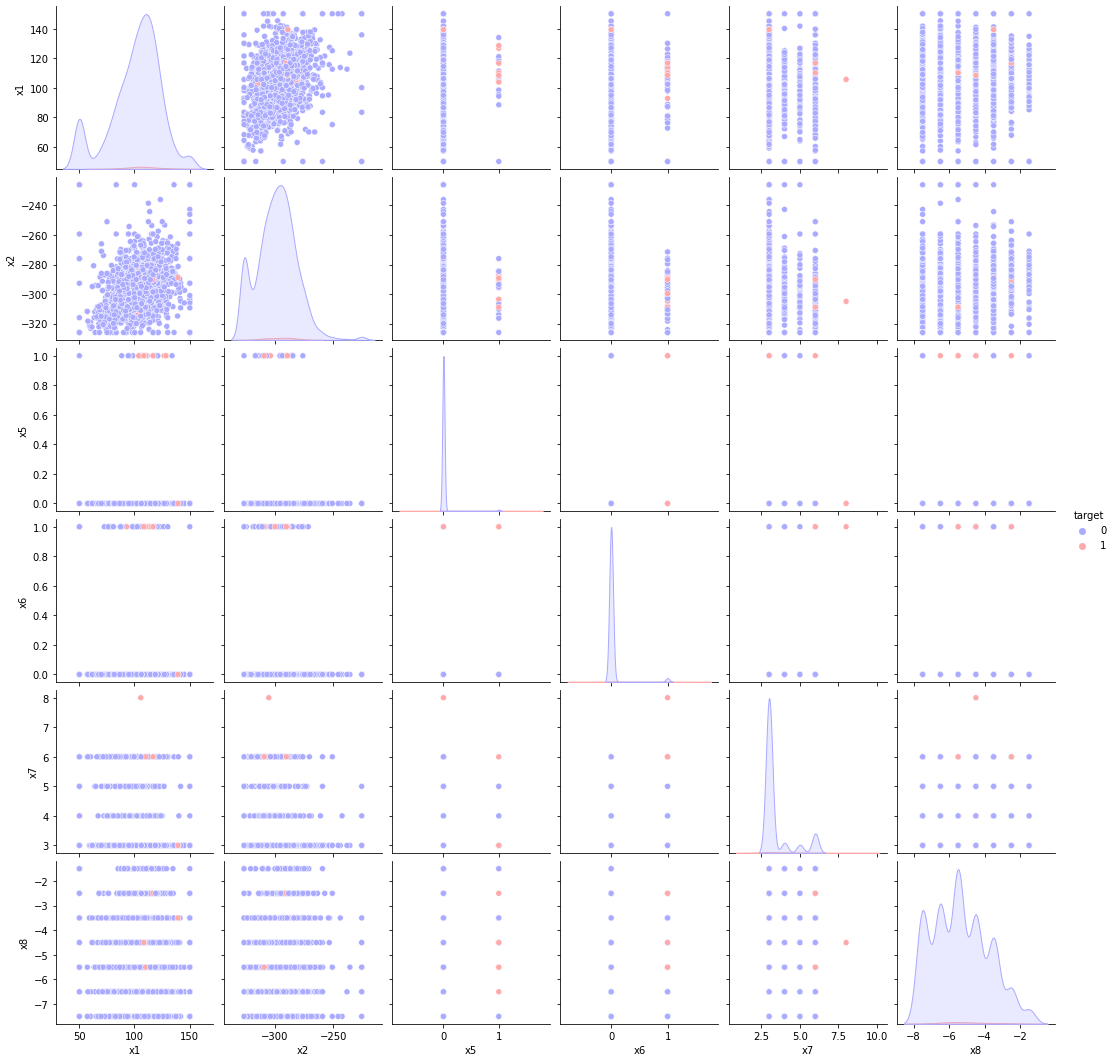

In [121]:
import seaborn as sns
sns.pairplot(data,hue='target',palette='bwr')

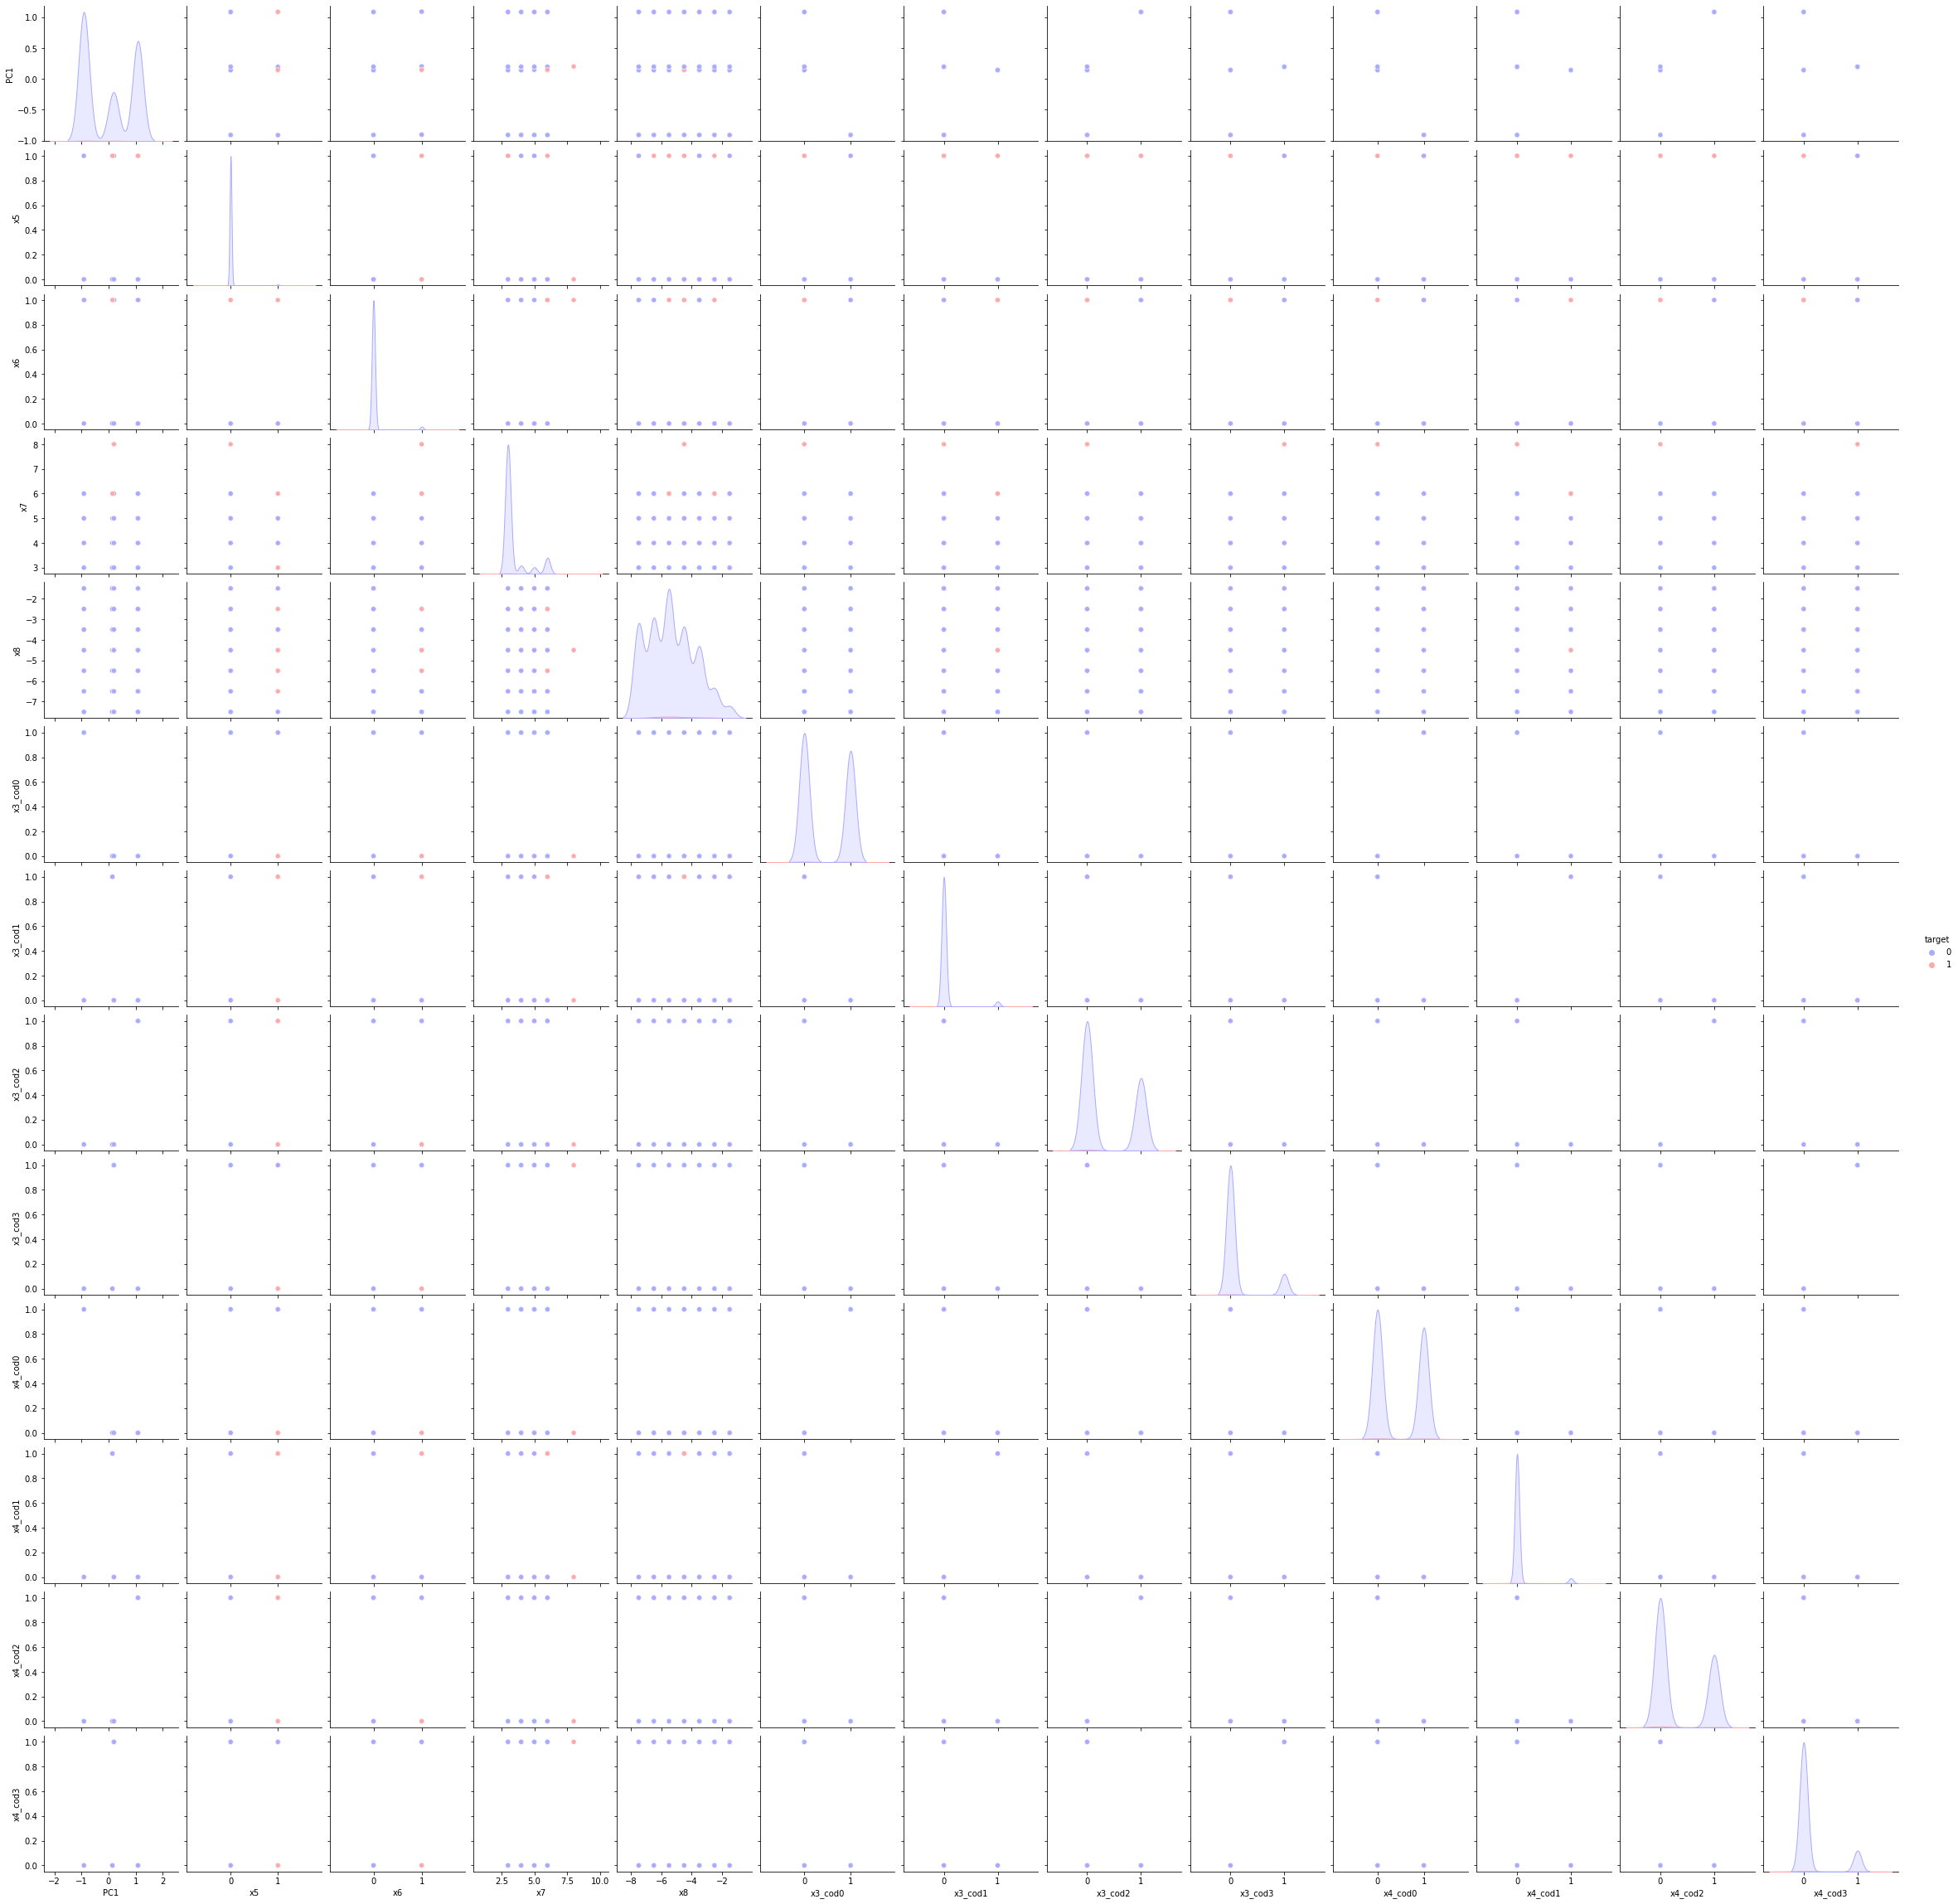

In [122]:
sns.pairplot(data_modelo2,hue='target',palette='bwr')

(array([926.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  79.,
        280.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 715.]),
 array([-0.91255447, -0.81237453, -0.71219459, -0.61201465, -0.5118347 ,
        -0.41165476, -0.31147482, -0.21129488, -0.11111493, -0.01093499,
         0.08924495,  0.18942489,  0.28960483,  0.38978478,  0.48996472,
         0.59014466,  0.6903246 ,  0.79050454,  0.89068449,  0.99086443,
         1.09104437]),
 <BarContainer object of 20 artists>)

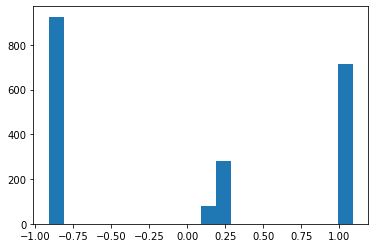

In [124]:
plt.hist(data_modelo2["PC1"], bins=20)

In [130]:
from sklearn.cluster import KMeans
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(data_modelo2["PC1"].values.reshape(-1, 1))


KMeans(n_clusters=3, random_state=0)

In [131]:
etiquetas = kmeans.predict(data_modelo2["PC1"].values.reshape(-1, 1))
data_modelo2['columna_categorica'] = etiquetas



Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f1f04c19790>
Traceback (most recent call last):
  File "/home/nicolas/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/nicolas/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/nicolas/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/nicolas/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


In [132]:
data_modelo2

,PC1,x5,x6,x7,x8,target,x3_cod0,x3_cod1,x3_cod2,x3_cod3,x4_cod0,x4_cod1,x4_cod2,x4_cod3,columna_categorica
0,1.085710,0,0,6,-6.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1,1.085710,0,0,6,-4.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,-0.910175,0,0,3,-2.5,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,1.085710,0,0,3,-4.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,0.196582,0,0,5,-4.5,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.142639,0,0,3,-2.5,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2
1996,0.196582,0,0,3,-2.5,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
1997,1.085710,0,0,3,-5.5,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
1998,-0.910175,0,0,3,-5.5,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [169]:
X = data_modelo2[["columna_categorica", 'x5', 'x6',"x3_cod0","x3_cod1","x3_cod2","x3_cod3",
                            "x4_cod0","x4_cod1","x4_cod2","x4_cod3"]]
y = data['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)
from sklearn.metrics import roc_auc_score, f1_score

f1_test = f1_score(y_test, y_test_pred, average = "weighted")
auc_train = roc_auc_score(y_train, y_train_pred)
auc_test = roc_auc_score(y_test, y_test_pred)
print("AUC train: %.4f" % auc_train)
print("AUC test: %.4f" % auc_test)
print("F-1 score (test): %.4f" % f1_test)

AUC train: 0.5769
AUC test: 0.5000
F-1 score (test): 0.9832


In [162]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir las probabilidades de clase con los datos de entrenamiento y prueba
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calcular el AUC y F1-Score para los datos de entrenamiento
auc_train = roc_auc_score(y_train, y_train_proba)
f1_train = f1_score(y_train, model.predict(X_train))

# Calcular el AUC y F1-Score para los datos de prueba
auc_test = roc_auc_score(y_test, y_test_proba)
f1_test = f1_score(y_test, model.predict(X_test), average = "weighted")

# Imprimir los resultados
print("AUC (train): {:.3f}".format(auc_train))
print("AUC (test): {:.3f}".format(auc_test))
print("F1-Score (train): {:.3f}".format(f1_train))
print("F1-Score (test): {:.3f}".format(f1_test))

AUC (train): 0.886
AUC (test): 0.770
F1-Score (train): 0.143
F1-Score (test): 0.983


In [163]:
X = data_modelo2[["PC1", 'x5', 'x6',"x3_cod0","x3_cod1","x3_cod2","x3_cod3",
                            "x4_cod0","x4_cod1","x4_cod2","x4_cod3"]]
y = data['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)
from sklearn.metrics import roc_auc_score, f1_score

f1_test = f1_score(y_test, y_test_pred, average = "weighted")
auc_train = roc_auc_score(y_train, y_train_pred)
auc_test = roc_auc_score(y_test, y_test_pred)
print("AUC train: %.4f" % auc_train)
print("AUC test: %.4f" % auc_test)
print("F-1 score (test): %.4f" % f1_test)

AUC train: 0.5769
AUC test: 0.5556
F-1 score (test): 0.9860


In [165]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir las probabilidades de clase con los datos de entrenamiento y prueba
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calcular el AUC y F1-Score para los datos de entrenamiento
auc_train = roc_auc_score(y_train, y_train_proba)
f1_train = f1_score(y_train, model.predict(X_train))

# Calcular el AUC y F1-Score para los datos de prueba
auc_test = roc_auc_score(y_test, y_test_proba)
f1_test = f1_score(y_test, model.predict(X_test), average = "weighted")

# Imprimir los resultados
print("AUC (train): {:.3f}".format(auc_train))
print("AUC (test): {:.3f}".format(auc_test))
print("F1-Score (train): {:.3f}".format(f1_train))
print("F1-Score (test): {:.3f}".format(f1_test))

AUC (train): 0.923
AUC (test): 0.623
F1-Score (train): 0.000
F1-Score (test): 0.986


In [154]:
from sklearn.decomposition import PCA

# Definir el número de componentes a obtener
n_componentes = 3

# Crear un modelo PCA
pca = PCA(n_components=n_componentes)

# Ajustar el modelo a los datos codificados
pca.fit(data_modelo2[["PC1", 'x5', 'x6',"x3_cod0","x3_cod1","x3_cod2","x3_cod3",
                            "x4_cod0","x4_cod1","x4_cod2","x4_cod3"]])

# Transformar los datos codificados a las nuevas dimensiones
df_reducido = pd.DataFrame(pca.transform(data_modelo2[["PC1", 'x5', 'x6',"x3_cod0","x3_cod1","x3_cod2","x3_cod3",
                            "x4_cod0","x4_cod1","x4_cod2","x4_cod3"]]), columns = ["C1","C2","C3"])
df_reducido


,C1,C2,C3
0,1.535425,-0.339583,-0.053639
1,1.535425,-0.339583,-0.053639
2,-1.287182,-0.212504,-0.039792
3,1.535425,-0.339583,-0.053639
4,0.278009,1.447278,-0.179854
...,...,...,...
1995,0.201722,0.421393,1.531533
1996,0.278009,1.447278,-0.179854
1997,1.535425,-0.339583,-0.053639
1998,-1.287182,-0.212504,-0.039792


In [166]:
X = df_reducido
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)
from sklearn.metrics import roc_auc_score, f1_score

f1_test = f1_score(y_test, y_test_pred, average = "weighted")
auc_train = roc_auc_score(y_train, y_train_pred)
auc_test = roc_auc_score(y_test, y_test_pred)
print("AUC train: %.4f" % auc_train)
print("AUC test: %.4f" % auc_test)
print("F-1 score (test): %.4f" % f1_test)

AUC train: 0.5385
AUC test: 0.5000
F-1 score (test): 0.9832


In [167]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir las probabilidades de clase con los datos de entrenamiento y prueba
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calcular el AUC y F1-Score para los datos de entrenamiento
auc_train = roc_auc_score(y_train, y_train_proba)
f1_train = f1_score(y_train, model.predict(X_train))

# Calcular el AUC y F1-Score para los datos de prueba
auc_test = roc_auc_score(y_test, y_test_proba)
f1_test = f1_score(y_test, model.predict(X_test), average = "weighted")

# Imprimir los resultados
print("AUC (train): {:.3f}".format(auc_train))
print("AUC (test): {:.3f}".format(auc_test))
print("F1-Score (train): {:.3f}".format(f1_train))
print("F1-Score (test): {:.3f}".format(f1_test))

AUC (train): 0.719
AUC (test): 0.699
F1-Score (train): 0.000
F1-Score (test): 0.983
